## First Inning Score Prediction

 IPL is very popular in India. The match of ipl has 20-20 overs, if we can estimate the score of the first innings. Although it is difficult to predict what will happen in cricket, this project would give us an estimate based on past matches.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import joblib
import time
import os
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import joblib
import time

In [3]:
df_auction= pd.read_csv(r"E:\Github Files\ipl\IPL_Prediction\datasets\auction.csv")
df_delivery = pd.read_csv(r"E:\Github Files\ipl\IPL_Prediction\datasets\deliveries.csv")
df_ipl = pd.read_csv(r"E:\Github Files\ipl\IPL_Prediction\datasets\ipl.csv")
df_ball = pd.read_csv(r"E:\Github Files\ipl\IPL_Prediction\datasets\IPL_Matches_2008_2022.csv")
df_matches= pd.read_csv(r"E:\Github Files\ipl\IPL_Prediction\datasets\matches.csv")
df_ipl_matches = pd.read_csv(r"E:\Github Files\ipl\IPL_Prediction\datasets\IPL_Matches_2008_2022.csv")

In [4]:
df_matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
df_delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
df_ipl

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129


In [7]:
df_delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [8]:
df_matches.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [9]:
df_ipl.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

#### filtering first inning score.

In [10]:
df_delivery = df_delivery[df_delivery['inning'] == 1]

In [11]:
df_matches_copy = df_matches[['id','city']]
df_delivery_copy = df_delivery[['match_id','batting_team','bowling_team']]
df_ipl_copy = df_ipl[['mid','runs_last_5','wickets_last_5','wickets','runs','overs','total']]

In [12]:
df_matches_merge = pd.merge(df_matches_copy,df_delivery_copy,left_on = 'id',right_on='match_id')

In [13]:
df = pd.merge(df_matches_merge,df_ipl_copy,left_on='id',right_on='mid')

In [14]:
df_matches_merge.duplicated().sum()

91986

In [15]:
df.duplicated().sum()

9251659

In [16]:
df1 = df.drop(['id','match_id','mid'],axis=1)

In [17]:
df1.duplicated().sum()

9251671

In [18]:
df1 = df1.drop_duplicates()

In [19]:
df1.shape

(76002, 9)

In [20]:
df1

,city,batting_team,bowling_team,runs_last_5,wickets_last_5,wickets,runs,overs,total
0,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,1,0,0,1,0.1,222
1,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,1,0,0,1,0.2,222
2,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,2,0,0,2,0.2,222
3,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,2,0,0,2,0.3,222
4,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,2,0,0,2,0.4,222
...,...,...,...,...,...,...,...,...,...
9312543,Bangalore,Royal Challengers Bangalore,Mumbai Indians,40,0,7,121,19.2,129
9312544,Bangalore,Royal Challengers Bangalore,Mumbai Indians,46,0,7,127,19.3,129
9312545,Bangalore,Royal Challengers Bangalore,Mumbai Indians,47,0,7,128,19.4,129
9312546,Bangalore,Royal Challengers Bangalore,Mumbai Indians,48,0,7,129,19.5,129


# Data Cleaning

In [21]:
def data_cleaning(df1):

    df1.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                     'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                     'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                    ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)


data_cleaning(df1)

In [22]:
df1 = df1.rename({'Maharashtra Cricket Association Stadium':"Subrata Roy Sahara Stadium"},axis=1)

In [23]:
df1.head()

,city,batting_team,bowling_team,runs_last_5,wickets_last_5,wickets,runs,overs,total
0,Hyderabad,SRH,RCB,1,0,0,1,0.1,222
1,Hyderabad,SRH,RCB,1,0,0,1,0.2,222
2,Hyderabad,SRH,RCB,2,0,0,2,0.2,222
3,Hyderabad,SRH,RCB,2,0,0,2,0.3,222
4,Hyderabad,SRH,RCB,2,0,0,2,0.4,222


In [24]:
import matplotlib.pyplot as plt

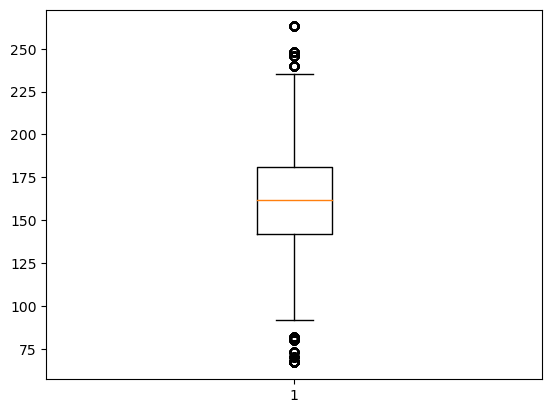

In [25]:
plt.boxplot(df1['total'])
plt.show()

In [26]:
df1.columns

Index(['city', 'batting_team', 'bowling_team', 'runs_last_5', 'wickets_last_5',
       'wickets', 'runs', 'overs', 'total'],
      dtype='object')

In [27]:
df1 = df1.dropna()

In [28]:
df1.shape

(75129, 9)

In [29]:
df1 = df1[df1['overs']>=5]

In [30]:
X = df1.drop('total',axis=1)
y = df1['total']

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [32]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(42042, 8) (42042,)
(14015, 8) (14015,)


In [33]:
# def data_encoding()

from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.neighbors import KNeighborsRegressor

In [34]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_test_cat = X_test.select_dtypes(include=['object'])

X_train_num = X_train.select_dtypes(include=['int64','float64'])
X_test_num = X_test.select_dtypes(include=['int64','float64'])

In [36]:
def label_encoding(train_df,test_df):
    label_encoder = LabelEncoder()
    for col in train_df:
        train_df[col] = label_encoder.fit_transform(train_df[col])
        test_df[col] = label_encoder.transform(test_df[col])

    return train_df,test_df
X_train_transform, X_test_transform = label_encoding(X_train_cat,X_test_cat)

In [37]:
X_train_transform = pd.concat([X_train_num,X_train_transform],axis=1)


In [38]:
X_train_transform


,runs_last_5,wickets_last_5,wickets,runs,overs,city,batting_team,bowling_team
3061876,18,1,2,40,7.6,7,9,0
7881841,59,0,2,152,17.6,20,4,9
6805894,31,2,5,119,15.6,10,6,7
5383032,22,2,3,37,6.1,2,1,9
4394608,37,2,4,83,13.1,14,5,6
...,...,...,...,...,...,...,...,...
7667171,45,1,1,51,6.5,21,7,2
8721772,23,1,1,42,8.1,20,2,4
7044381,40,1,3,73,10.4,28,6,12
7275385,36,1,1,77,10.3,1,11,4


In [39]:
X_test_transform = pd.concat([X_test_num,X_test_transform],axis=1)

### Algorithms:-

1. Linear Regression
2. Support Vector Regression
3. Decision Tree Regression
4. Random Forest Regression
5. Artificial Neural Network
4. Recursive Neural Network

In [40]:
X_train_transform=X_train_transform.dropna()

In [41]:

#
pipelines = {
    'linear': Pipeline([
        ('scaler', StandardScaler()),
        ('regression', LinearRegression())
    ]),
    'decision_tree': Pipeline([
        ('scaler', StandardScaler()),
        ('regression', DecisionTreeRegressor())
    ]),
    'random_forest': Pipeline([
        ('scaler', StandardScaler()),
        ('regression', RandomForestRegressor())
    ])
}

# Define param_grids
param_grids = {
    'linear':[
        {
            'scaler':[StandardScaler(),MinMaxScaler()]
        }
    
    ],
    'decision_tree':[
        {
            'scaler':[StandardScaler(),MinMaxScaler()],
            'regression__max_depth':[i for i in range(1,50,3)],
            'regression__max_leaf_nodes':[i for i in range(2,10)]
        }
    ],
    'random_forest':[
        {
            'scaler':[StandardScaler(),MinMaxScaler()],
        }
    ]
}



linear
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Train Score:  0.6385376812817063
Test Score:  0.6476316081227113
Mean Squared Error (MSE):  306.53163208162755
R2 Score:  0.6476316081227113
Root Mean Squared Error (RMSE):  17.508044781803235
Fit Time:  1.1251442432403564
Predict Time:  0.00787210464477539
Model Size:  1951


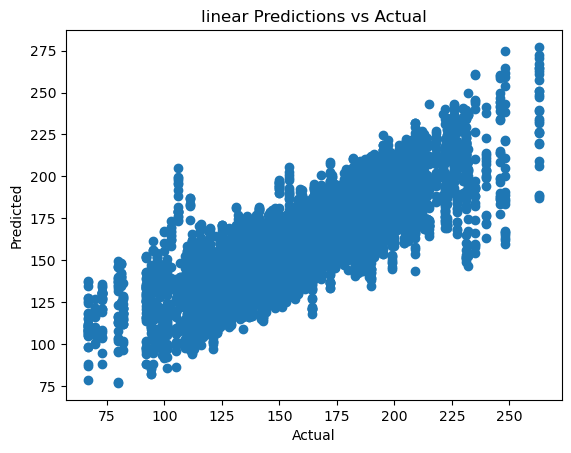

decision_tree
Fitting 5 folds for each of 272 candidates, totalling 1360 fits
Train Score:  0.42313256222009993
Test Score:  0.43867729488668994
Mean Squared Error (MSE):  488.30476537968696
R2 Score:  0.43867729488668994
Root Mean Squared Error (RMSE):  22.09761899797548
Fit Time:  547.1748585700989
Predict Time:  0.012698173522949219
Model Size:  3432


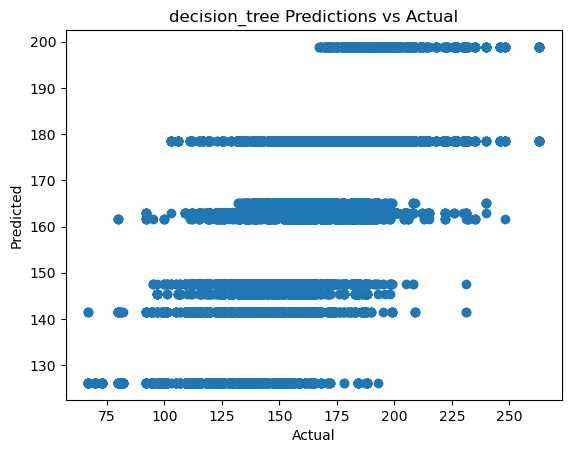

random_forest
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Train Score:  0.9334899262226655
Test Score:  0.9506391048973489
Mean Squared Error (MSE):  42.93993469793079
R2 Score:  0.9506391048973489
Root Mean Squared Error (RMSE):  6.552856987446833
Fit Time:  1033.1804490089417
Predict Time:  1.6703517436981201
Model Size:  164127239


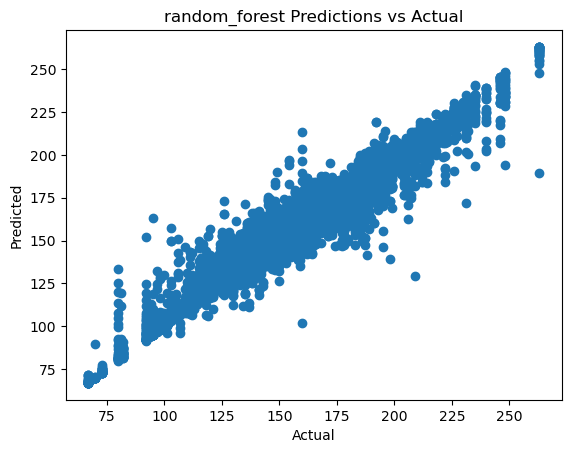

In [42]:
best_models = {}
for algo in pipelines.keys():
    print(algo)
    grid_search = GridSearchCV(estimator=pipelines[algo],
                              param_grid=param_grids[algo],
                              cv=5,
                              return_train_score=True,
                              verbose=1)
    
    # Fit
    start_fit_time = time.time()
    grid_search.fit(X_train_transform, y_train)
    end_fit_time = time.time()

    # Predict
    start_predict_time = time.time()
    y_pred = grid_search.predict(X_test_transform)
    end_predict_time = time.time()

    # Saving the best models
    joblib.dump(grid_search.best_estimator_, f'Second_inning_models/{algo}.pkl')
    model_size = os.path.getsize(f'Second_inning_models/{algo}.pkl')

    # Evaluation metrics
    train_score = grid_search.best_score_
    test_score = grid_search.score(X_test_transform, y_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = sqrt(mse)

    # Print evaluation metrics
    print('Train Score: ', train_score)
    print('Test Score: ', test_score)
    print('Mean Squared Error (MSE): ', mse)
    print('R2 Score: ', r2)
    print('Root Mean Squared Error (RMSE): ', rmse)
    print("Fit Time: ", end_fit_time - start_fit_time)
    print("Predict Time: ", end_predict_time - start_predict_time)
    print("Model Size: ", model_size)

    # Plot predictions vs actual values
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{algo} Predictions vs Actual')
    plt.show()


In [43]:
model = joblib.load('first_inning_models/random_forest.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'first_inning_models/random_forest.pkl'

In [ ]:
model.predict([[18,1,2,40,7.6,14,7,9,0]])

In [ ]:
df1.to_csv("first_inning_data.csv")